# <span style="color:#0b486b">SIT 720 - Machine Learning</span>

---
Lecturer:   Chandan Karmakar     | karmakar@deakin.edu.au<br />
Tutor:  

School of Information Technology, <br />
Deakin University, VIC 3125, Australia.

---

## Assignment 4


In this assignment, you will use a lot of concepts learnt in this course to come up with a good solution for a given human activity recognition problem.
This assignment has 4 parts.

**Instructions**
1. The dataset consists of training and testing data in "train" and "test" folders. Use training data: X_train.txt labels: y_train.txt and testing data: X_test.txt   labels: y_test.txt. There are other files that also come with the dataset and may be useful in understanding the dataset better.

2. Please read the pdf file "dataset-paper.pdf" to answer Part 1.


### Part 1: Understanding the data 

Answer the following questions briefly, after reading the paper **(3 Marks)**

* What is the objective of the data collection process? 



* What human activity types does this dataset have? How many subjects/people have performed these activities? 



* How many instances are available in the training and test sets? How many features are used to represent each instance? Summarize the type of features extracted in 2-3 sentences. 



* Describe briefly what machine learning model is used in this paper for activity recognition and how is it trained. How much is the maximum accuracy achieved? 


### Part 2: K-Nearest Neighbour Classification

Build a K-Nearest Neighbor classifier for this data. **(5 Marks)** 

* Let K take values from 1 to 50. For choosing the best K, use 10-fold cross-validation. Choose the best value of K based on model F1-score. 
* Show a plot of cross-validation accuracy with respect to K. 
* Using the best K value, evaluate the model performance on the supplied test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

### Part 3: Multiclass Logistic Regression with Elastic Net

Build an elastic-net regularized logistic regression classifier for this data. **(5 Marks)**
* Elastic-net regularizer takes in 2 parameters: alpha and l1-ratio. Use the following values for alpha: 1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2. Use the following values for l1-ratio: 0,0.15,0.5,0.7,1. 

* Choose the best values of alpha and l1-ratio using 10-fold cross-validation, based on model F1-score.

* Draw a surface plot of F1-score with respect to alpha and l1-ratio values.

* Use the best value of alpha and l1-ratio to re-train the model on the training set and use it to predict the labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

### Part 4: Support Vector Machine (RBF Kernel)

Build a SVM (with RBF Kernel) classifier for this data. **(6 Marks)**
* SVM with RBF takes 2 parameters: gamma (length scale of the RBF kernel)  and C (the cost parameter). Use the following values for gamma: 1e-3, 1e-4. Use the following values for C: 1, 10, 100, 1000.

* Choose the best values of gamma and C using 10-fold cross-validation, based on model F1-score.

* Draw a surface plot of F1-score with respect to gamma and C.

* Use the best value of gamma and C to re-train the model on the training set and use it to predict the labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

### Part 5: Random Forest

Build a Random forest classifier for this data. **(6 Marks)**
* Random forest uses two parameters: the tree-depth for each decision tree and the number of trees. Use the following values for the tree-depth: 300,500,600. Use the following values for the number of trees: 200,500,700.

* Choose the best values of tree-depth and number of trees using 10-fold cross-validation, based on model F1-score.

* Draw a surface plot of F1-score with respect to tree-depth and number of trees.

* Use the best value of tree-depth and number of trees to re-train the model on the training set and use it to predict the labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.


### Part 6: Discussion

Write a brief discussion about which classification method achieved the best performance. Your thoughts on the reason behind this. What method performed the worst? Could you do better or worse than the results in the dataset paper? Do you have any suggestions to further improve model performances? **(5 Marks)**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import model_selection

#PART-1

#1.1
X_train = pd.read_table("train/X_train.txt", delim_whitespace = True)
y_train = pd.read_table("train/y_train.txt", delim_whitespace = True)
X_test = pd.read_table("test/X_test.txt", delim_whitespace = True)
y_test = pd.read_table("test/y_test.txt", delim_whitespace = True)

print("Number of features in the dataset:")

train_rows, train_cols = X_train.shape
print("Training Data has: {} rows and {} cols".format(train_rows, train_cols))

test_rows, test_cols = X_test.shape
print("Testing Data has: {} rows and {} cols".format(test_rows, test_cols))

print(np.unique(y_train))

Number of features in the dataset:
Training Data has: 7351 rows and 561 cols
Testing Data has: 2946 rows and 561 cols
[1 2 3 4 5 6]


In [20]:
n=list(range(1,51))
f1_k = []

for k in n:
    knn_model = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2)
    kfold = model_selection.KFold(n_splits = 10, random_state = 42)
    f1 = model_selection.cross_val_score(knn_model, X_train, y_train, cv=kfold, scoring = 'f1_macro')
    f1_k.append(f1.mean())

from pandas import DataFrame

print ("F1 scores: {}".format(f1_k))


C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ishaan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vect

F1 scores: [0.876535660772707, 0.8631176203510165, 0.8871332765200941, 0.8852197450809911, 0.8907682071841805, 0.8901071958767185, 0.89358862095612, 0.8956277113958411, 0.8942451779525932, 0.8958153389041679, 0.8944138147869184, 0.8966388728317465, 0.8949029284107789, 0.8973024825416763, 0.8960998019407587, 0.8962652337771934, 0.8954451957008436, 0.8960478316583644, 0.8961082719321214, 0.8976087020940436, 0.897401409506282, 0.8968020725304504, 0.8980415706567658, 0.8971277790249846, 0.8973096975352419, 0.8962252323911482, 0.8949829874778269, 0.8958172315144599, 0.8936652302123658, 0.8949220659497243, 0.8960832852625696, 0.895351344631473, 0.8963346085126247, 0.8959202170716882, 0.895994530736591, 0.8958663974449486, 0.8976293074202808, 0.8981567886179981, 0.8975558790289924, 0.8972444162726092, 0.8973984132377524, 0.8961492014506411, 0.8962320172363917, 0.8967162264519863, 0.8958547430639342, 0.8957787763524847, 0.8948919622093869, 0.8952939727096212, 0.8951992145803812, 0.894904411078

In [22]:
bk = n[f1_k.index(max(f1_k))]
print("The best value of k is: ",bk)

The best value of k is:  38


C:\Users\Ishaan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNN Testing Accuracy: 0.896469789545146
KNN F1 Score: 0.8926380888554251


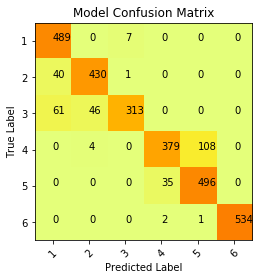

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=bk)
knn_model.fit(X_train, y_train)

knn_acc_test = metrics.accuracy_score(y_test, knn_model.predict(X_test))
knn_f1_test = metrics.f1_score(y_test, knn_model.predict(X_test), average = 'macro')
print ("KNN Testing Accuracy: {}".format(knn_acc_test))
print ("KNN F1 Score: {}".format(knn_f1_test))

knn_cm_test = metrics.confusion_matrix(y_test, knn_model.predict(X_test))

plt.clf()
plt.imshow(knn_cm_test, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['1', '2', '3', '4', '5', '6']
plt.title('Model Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(len(classNames)):
    for j in range(len(classNames)):
        plt.text(j,i,str(knn_cm_test[i][j]))
plt.show()

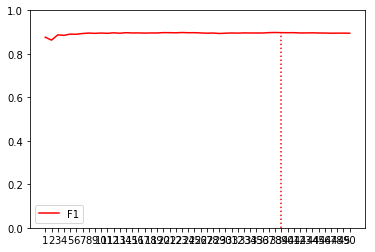

In [28]:
plt.plot(range(0,len(n)), f1_k, color='r', label='F1')

plt.xticks(range(0,len(n)), n, rotation='horizontal')

plt.plot((bk, bk), (0, f1_k[bk]), ls='dotted', color='r')

axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()